In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import random
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras import initializers
from keras.optimizers import RMSprop
import time


Using TensorFlow backend.


### Print Dataset Directory

In [2]:
data_dir = os.listdir('../../../train_ds/')
for data in data_dir: 
    print(data)

savee378-0.wav
cremad11240-4.wav
savee464-3.wav
ravdess4052-1.wav
cremad13942-0.wav
ravdess3029-7.wav
ravdess4271-0.wav
ravdess4324-5.wav
cremad13422-1.wav
savee1180-6.wav
ravdess2394-2.wav
cremad14036-4.wav
cremad374-1.wav
cremad1147-1.wav
ravdess3564-7.wav
cremad12441-5.wav
cremad14485-1.wav
cremad2180-5.wav
cremad8610-2.wav
cremad1081-2.wav
ravdess945-3.wav
savee656-4.wav
cremad11603-1.wav
cremad803-0.wav
cremad9075-1.wav
cremad2414-3.wav
cremad13664-4.wav
savee133-1.wav
cremad7116-1.wav
cremad4241-3.wav
ravdess3197-4.wav
savee266-5.wav
cremad1389-0.wav
cremad13297-1.wav
cremad1982-0.wav
cremad12274-3.wav
cremad14583-0.wav
cremad4846-4.wav
cremad12343-1.wav
cremad10687-1.wav
ravdess1923-5.wav
savee38-5.wav
savee709-4.wav
ravdess3994-1.wav
ravdess2040-6.wav
cremad1890-2.wav
cremad9896-0.wav
cremad12436-3.wav
cremad5599-4.wav
cremad8466-1.wav
cremad6213-5.wav
cremad14823-3.wav
cremad6834-0.wav
cremad14109-2.wav
ravdess224-7.wav
cremad4406-1.wav
cremad11909-2.wav
cremad6405-5.wav
crema

cremad13791-3.wav
ravdess1703-1.wav
ravdess2587-0.wav
cremad8644-2.wav
cremad1753-2.wav
savee1586-3.wav
cremad10138-3.wav
cremad1619-5.wav
cremad6001-4.wav
cremad2995-2.wav
cremad10185-1.wav
ravdess3008-6.wav
cremad5270-5.wav
cremad11938-2.wav
cremad4800-3.wav
cremad11033-5.wav
cremad2919-0.wav
cremad6091-2.wav
cremad5318-1.wav
cremad9023-5.wav
ravdess3610-1.wav
ravdess4441-0.wav
cremad10061-3.wav
ravdess3691-3.wav
cremad15022-0.wav
cremad12068-1.wav
cremad4900-1.wav
cremad8233-4.wav
ravdess1618-6.wav
savee1454-3.wav
cremad400-0.wav
ravdess3933-0.wav
ravdess3707-1.wav
ravdess235-4.wav
cremad3306-1.wav
cremad4310-5.wav
cremad7730-1.wav
cremad8649-1.wav
cremad11559-0.wav
cremad8782-2.wav
cremad9619-2.wav
cremad5049-3.wav
cremad8809-1.wav
ravdess376-3.wav
cremad10945-4.wav
cremad13167-4.wav
cremad8999-3.wav
ravdess3093-0.wav
cremad717-1.wav
cremad11355-0.wav
ravdess2455-6.wav
cremad4511-2.wav
cremad13822-1.wav
cremad3927-0.wav
cremad1599-3.wav
savee382-0.wav
cremad2864-2.wav
cremad815-1.w

ravdess415-4.wav
cremad14194-0.wav
cremad6306-4.wav
cremad12919-0.wav
cremad11368-0.wav
cremad4738-2.wav
cremad2087-0.wav
ravdess1601-7.wav
cremad13847-2.wav
cremad5670-3.wav
cremad13880-0.wav
cremad8271-3.wav
cremad11748-4.wav
cremad15241-0.wav
cremad14689-2.wav
cremad11955-3.wav
cremad7910-1.wav
ravdess734-1.wav
cremad11980-1.wav
cremad9852-0.wav
cremad7758-2.wav
cremad3485-2.wav
cremad7705-0.wav
cremad8349-1.wav
cremad2597-4.wav
savee521-4.wav
cremad7732-1.wav
savee473-0.wav
cremad14377-0.wav
cremad13434-1.wav
cremad749-1.wav
cremad7130-5.wav
cremad6909-2.wav
ravdess3243-0.wav
cremad1480-0.wav
savee514-0.wav
cremad2534-2.wav
cremad9357-3.wav
cremad1092-2.wav
ravdess3083-1.wav
cremad8403-2.wav
savee429-5.wav
cremad12042-3.wav
cremad10832-0.wav
ravdess656-5.wav
cremad8578-4.wav
ravdess911-6.wav
cremad12497-5.wav
cremad7313-0.wav
cremad9323-1.wav
ravdess1017-4.wav
cremad13606-0.wav
cremad4950-2.wav
cremad541-5.wav
cremad4898-2.wav
cremad2982-3.wav
savee1525-4.wav
cremad14904-2.wav
crem

cremad11523-1.wav
cremad1186-3.wav
cremad12771-5.wav
cremad11057-3.wav
savee137-2.wav
ravdess2596-2.wav
cremad326-2.wav
cremad6710-5.wav
cremad232-2.wav
cremad12083-4.wav
cremad1862-5.wav
savee268-5.wav
cremad5548-2.wav
cremad857-5.wav
cremad12517-2.wav
cremad10471-1.wav
ravdess1035-5.wav
cremad14413-2.wav
ravdess2831-1.wav
ravdess519-0.wav
ravdess849-5.wav
cremad1136-2.wav
ravdess788-1.wav
cremad14935-2.wav
cremad14815-4.wav
ravdess1996-3.wav
cremad6016-2.wav
cremad1819-2.wav
cremad10956-0.wav
cremad8049-5.wav
ravdess3676-5.wav
cremad3-2.wav
cremad201-3.wav
cremad6929-4.wav
savee269-5.wav
cremad4400-2.wav
cremad13694-4.wav
ravdess2542-7.wav
cremad13157-5.wav
cremad9008-0.wav
cremad12255-2.wav
cremad10394-1.wav
cremad520-0.wav
cremad7114-4.wav
cremad3042-2.wav
cremad5339-0.wav
cremad4301-2.wav
cremad3115-0.wav
cremad2970-0.wav
cremad12702-3.wav
ravdess4314-2.wav
cremad5954-0.wav
savee1325-1.wav
savee117-4.wav
cremad5522-5.wav
cremad314-4.wav
cremad6819-0.wav
ravdess1157-3.wav
cremad639

cremad3558-4.wav
cremad1652-2.wav
cremad12943-0.wav
ravdess3588-1.wav
mahnob22-8.wav
cremad11773-4.wav
cremad6114-3.wav
cremad2404-3.wav
cremad11995-4.wav
cremad14461-5.wav
cremad4236-0.wav
cremad2867-4.wav
ravdess955-3.wav
savee755-1.wav
ravdess3379-5.wav
cremad14513-4.wav
cremad2837-4.wav
cremad13985-1.wav
cremad12446-5.wav
savee754-1.wav
cremad11976-2.wav
cremad4050-3.wav
cremad8054-1.wav
cremad8258-0.wav
ravdess3870-6.wav
cremad15267-5.wav
ravdess1831-1.wav
cremad6548-5.wav
cremad6062-2.wav
cremad13129-1.wav
ravdess2445-6.wav
ravdess1980-6.wav
ravdess484-0.wav
cremad8082-5.wav
cremad10289-5.wav
cremad12000-0.wav
cremad5602-3.wav
savee1507-1.wav
ravdess2349-7.wav
ravdess1622-1.wav
cremad13484-5.wav
cremad12102-1.wav
cremad8458-2.wav
cremad13747-3.wav
cremad13932-0.wav
savee1005-6.wav
cremad2358-2.wav
cremad13483-3.wav
cremad1400-3.wav
cremad6344-3.wav
cremad886-2.wav
ravdess2693-4.wav
cremad13492-1.wav
cremad4845-3.wav
ravdess2220-7.wav
cremad9648-4.wav
savee1235-5.wav
cremad15187-3

### Import Dataset

In [3]:
data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../train_ds/' + file
    label = int(nm[1])

    data.loc[cnt] = [path, label]
    cnt += 1

data.head()

,path,label
0,../../../train_ds/savee378-0.wav,0
1,../../../train_ds/cremad11240-4.wav,4
2,../../../train_ds/savee464-3.wav,3
3,../../../train_ds/ravdess4052-1.wav,1
4,../../../train_ds/cremad13942-0.wav,0



### Testing imported Data


In [4]:
filename = data.path[0]
print (filename)

samples, sample_rate = librosa.load(filename)

../../../train_ds/savee378-0.wav


In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Plotting raw Wave Form and Spectrogram

Text(0.5, 0, 'Seconds')

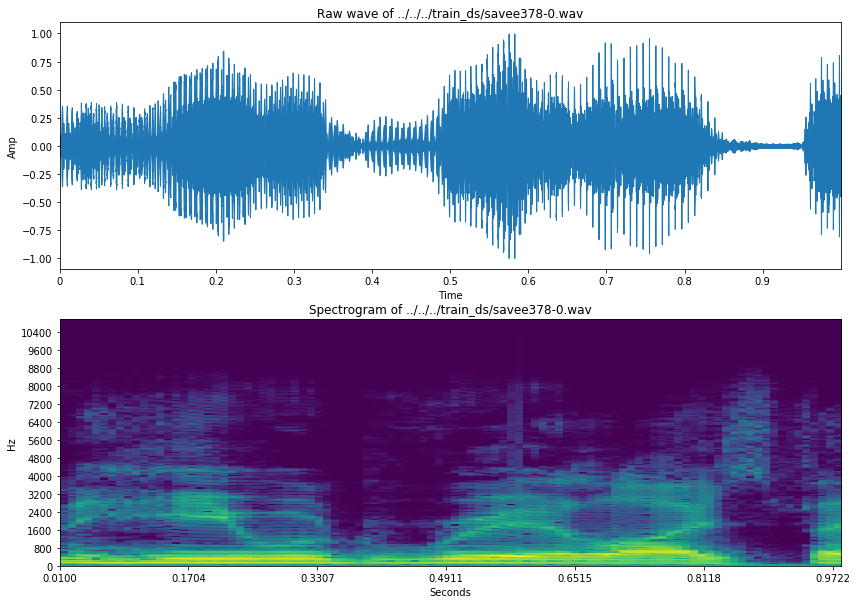

In [6]:
# Plotting Wave Form and Spectrogram

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amp')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Hz')
ax2.set_xlabel('Seconds')

### Cepstral Mean Normalization

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)

spectrogram = (spectrogram - mean) / std

### Plotting Mel Power Spectrogram

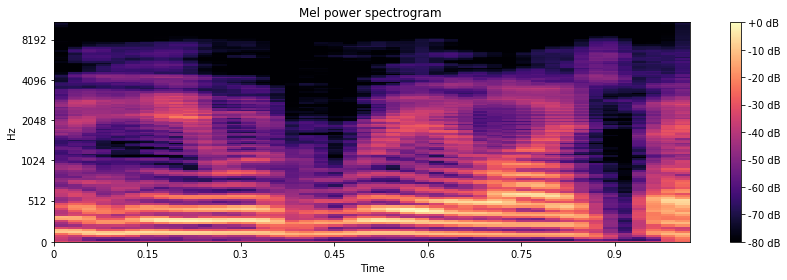

In [8]:
mps = librosa.feature.melspectrogram(samples,
                                     sr=sample_rate,
                                     n_mels=128)

# Convert to log scale
log_mps = librosa.power_to_db(mps, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mps, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Plotting MFCC

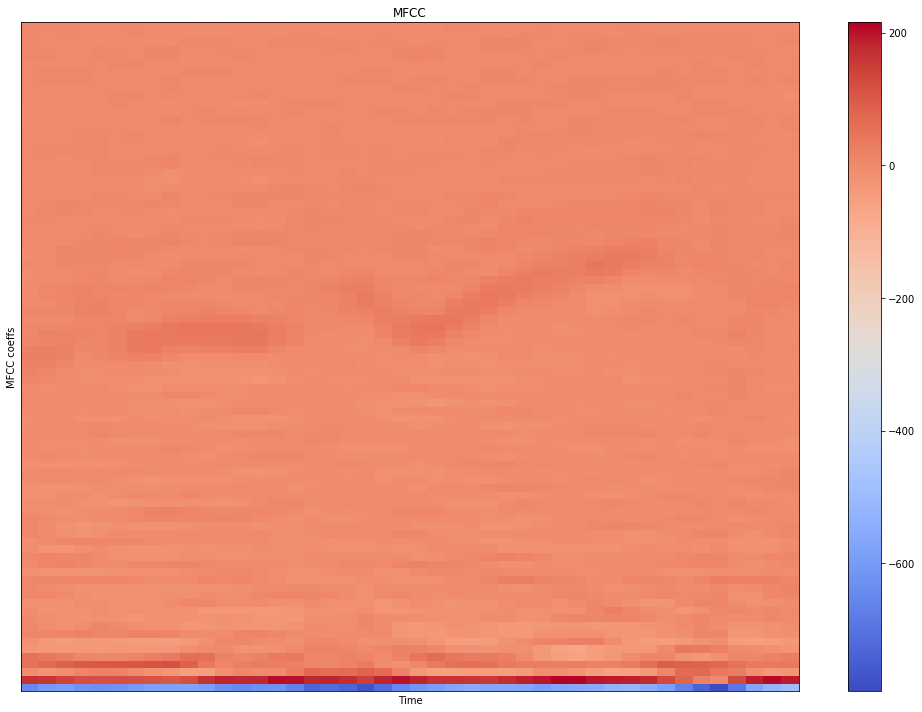

In [9]:
mfcc = librosa.feature.mfcc(S=log_mps, n_mfcc=87)

plt.figure(figsize=(14, 10))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [10]:
data2 = data.copy()
data2.head()

,path,label
0,../../../train_ds/savee378-0.wav,0
1,../../../train_ds/cremad11240-4.wav,4
2,../../../train_ds/savee464-3.wav,3
3,../../../train_ds/ravdess4052-1.wav,1
4,../../../train_ds/cremad13942-0.wav,0


### Convert dataset paths into mfccs

In [11]:
data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(len(data2))):
    X, sample_rate = librosa.load(data2.path[i],
                                  res_type = 'kaiser_fast',
                                  duration = 1,
                                  sr = 22050*2)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=87)
    mfccs = np.stack((mfccs,) * 3, axis = -1)
    data.loc[i] = [mfccs, data2.label[i]]

data.head()

100%|██████████| 21570/21570 [02:12<00:00, 162.42it/s]


,feature,label
0,"[[[-327.59705, -327.59705, -327.59705], [-302....",0
1,"[[[-540.2221, -540.2221, -540.2221], [-538.852...",4
2,"[[[-437.8285, -437.8285, -437.8285], [-437.910...",3
3,"[[[-317.0347, -317.0347, -317.0347], [-308.733...",1
4,"[[[-385.6237, -385.6237, -385.6237], [-395.638...",0


### Split Test set before augmentation

In [12]:
X = data['feature'].values.tolist()
X = np.reshape(X, (len(data2), 87, 87, 3))
y = data.label
X_train_norm, X_test, y_train_norm, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Define Data Augmentation Methods

In [13]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.02*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*700)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 1.25 *(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.3,high=5)
    return (data * dyn_change)


### Save Augmented Data for testing

In [14]:
X, sample_rate = librosa.load(data2.path[0], res_type='kaiser_fast',duration=1,sr=22050*2)
noise_sample = noise(X)
librosa.output.write_wav('noise_sample.wav', noise_sample, sample_rate)
shift_sample = shift(X)
librosa.output.write_wav('shift_sample.wav', shift_sample, sample_rate)
pitch_sample = pitch(X, sample_rate)
librosa.output.write_wav('pitch_sample.wav', pitch_sample, sample_rate)
dyn_change_sample = dyn_change(X)
librosa.output.write_wav('dyn_change_sample.wav', dyn_change_sample, sample_rate)

### Increase Train Set by using Data Augmentation

In [15]:
num_augs = 4
aug_data = pd.DataFrame(columns=['feature', 'label'])
aug_fac = 1
aug_idx = 0

for _ in range(aug_fac):
    for i in tqdm(range(int(len(data2) * 0.8))):
        X, sample_rate = librosa.load(data2.path[i],
                                      res_type='kaiser_fast',
                                      duration=1,
                                      sr=22050*2)
        aug = random.randint(0, num_augs)
        if aug is 0:
            X = noise(X)
        elif aug is 1:
            X = shift(X)
        elif aug is 2:
            X = pitch(X, sample_rate)
        elif aug is 3:
            X = dyn_change(X)     
        sample_rate = np.array(sample_rate)
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=87)
        mfccs = np.stack((mfccs,) * 3, axis = -1)
        aug_data.loc[aug_idx] = [mfccs, data.label[i]]
        aug_idx += 1

100%|██████████| 17256/17256 [04:20<00:00, 66.29it/s]


In [16]:
print(aug_data.feature.shape)
print(data.feature.shape)

(17256,)
(21570,)


### Combining the Augmented data with original

In [17]:
X_train_aug = aug_data['feature'].values.tolist()
X_train_aug = np.reshape(X_train_aug, (17256, 87, 87, 3))
y_train_aug = aug_data.label
X_train = np.stack((X_train_norm, X_train_aug)).reshape(34512, 87, 87, 3)
y_train = np.stack((y_train_norm, y_train_aug)).reshape(34512, 1)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/home/ee1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Apply Cepstral Mean Normalization

In [18]:
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
test_std = np.std(X_test, axis=0)

X_train = (X_train - train_mean) / train_std
X_test = (X_test - test_mean) / test_std

print(X_train[0][0].dtype)

float32


### Set up Keras util functions

In [19]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

### Define Keras Model

In [20]:
model = keras.models.Sequential([
    keras.applications.Xception(include_top = False,
             weights = 'imagenet',
             input_tensor = None,
             input_shape = (87, 87, 3),
             pooling = None,
             classes = 10),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

83689472/83683744 [==============================] - 80s 1us/step


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [22]:
hist = model.fit(X_train,
                y_train,
                epochs=10,
                batch_size=16,
                validation_data=(X_test, y_test))

Train on 34512 samples, validate on 4314 samples
Epoch 1/10
34512/34512 [==============================] - 1247s 36ms/step - loss: 1.6179 - accuracy: 0.3576 - val_loss: 1.5561 - val_accuracy: 0.3952
Epoch 2/10
34512/34512 [==============================] - 1254s 36ms/step - loss: 1.3606 - accuracy: 0.4786 - val_loss: 1.4336 - val_accuracy: 0.4666
Epoch 3/10
34512/34512 [==============================] - 1268s 37ms/step - loss: 1.1640 - accuracy: 0.5575 - val_loss: 1.3523 - val_accuracy: 0.4949
Epoch 4/10
34512/34512 [==============================] - 1264s 37ms/step - loss: 0.9304 - accuracy: 0.6563 - val_loss: 1.5554 - val_accuracy: 0.4787
Epoch 5/10
34512/34512 [==============================] - 1265s 37ms/step - loss: 0.6752 - accuracy: 0.7549 - val_loss: 1.7451 - val_accuracy: 0.4926
Epoch 6/10
34512/34512 [==============================] - 1274s 37ms/step - loss: 0.4707 - accuracy: 0.8306 - val_loss: 1.9232 - val_accuracy: 0.4764
Epoch 7/10
34512/34512 [===========================

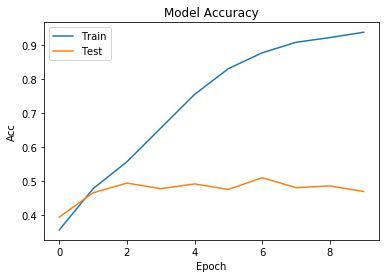

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model.save('tl_xception_model.h5')

### Test

In [25]:
data_dir = os.listdir('../../../test_ds/')
for data in data_dir: 
    print(data)

tess1640-4.wav
tess4201-6.wav
tess3674-1.wav
tess3687-1.wav
tess2798-5.wav
tess118-0.wav
tess3536-1.wav
tess2007-1.wav
tess3553-1.wav
tess2140-1.wav
tess3559-1.wav
tess716-0.wav
tess3407-1.wav
tess3794-4.wav
tess2521-5.wav
tess276-0.wav
tess2091-1.wav
tess4285-6.wav
tess1868-1.wav
tess2367-2.wav
tess4273-6.wav
tess977-5.wav
tess3280-6.wav
tess4326-6.wav
tess497-3.wav
tess2794-5.wav
tess298-0.wav
tess3589-1.wav
tess2196-1.wav
tess904-5.wav
tess679-0.wav
tess3325-6.wav
tess119-0.wav
tess1667-4.wav
tess2708-5.wav
tess2910-2.wav
tess449-3.wav
tess201-0.wav
tess2840-2.wav
tess3247-6.wav
tess2031-1.wav
tess3813-4.wav
tess2994-2.wav
tess68-0.wav
tess2801-5.wav
tess1398-3.wav
tess3442-1.wav
tess331-0.wav
tess2625-5.wav
tess4289-6.wav
tess4359-6.wav
tess669-0.wav
tess2493-5.wav
tess244-0.wav
tess2787-5.wav
tess574-3.wav
tess2760-5.wav
tess3202-6.wav
tess3323-6.wav
tess2361-2.wav
tess3120-6.wav
tess1062-5.wav
tess2990-2.wav
tess1859-1.wav
tess2815-5.wav
tess569-3.wav
tess956-5.wav
tess3665-1.wav

tess1928-1.wav
tess1612-4.wav
tess3364-1.wav
tess3541-1.wav
tess1679-4.wav
tess3071-6.wav
tess1343-3.wav
tess3726-1.wav
tess391-3.wav
tess3825-4.wav
tess3897-4.wav
tess1237-3.wav
tess1730-4.wav
tess3506-1.wav
tess3889-4.wav
tess2441-5.wav
tess179-0.wav
tess2961-2.wav
tess2429-2.wav
tess2616-5.wav
tess1196-5.wav
tess2824-5.wav
tess1103-5.wav
tess2011-1.wav
tess2142-1.wav
tess67-0.wav
tess3555-1.wav
tess0-0.wav
tess512-3.wav
tess2226-1.wav
tess2581-5.wav
tess1144-5.wav
tess2324-2.wav
tess2984-2.wav
tess1748-4.wav
tess4249-6.wav
tess3406-1.wav
tess928-5.wav
tess4370-6.wav
tess16-0.wav
tess1867-1.wav
tess1072-5.wav
tess1564-4.wav
tess165-0.wav
tess2792-5.wav
tess258-0.wav
tess3327-6.wav
tess3081-6.wav
tess4235-6.wav
tess3524-1.wav
tess1083-5.wav
tess667-0.wav
tess1067-5.wav
tess3605-1.wav
tess3434-1.wav
tess855-5.wav
tess2920-2.wav
tess3750-1.wav
tess1235-3.wav
tess1299-3.wav
tess3993-4.wav
mahnob6-9.wav
tess2260-2.wav
tess4322-6.wav
tess2754-5.wav
tess546-3.wav
tess2379-2.wav
tess1535-4.w

In [26]:
test_data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../test_ds/' + file
    label = int(nm[1])

    test_data.loc[cnt] = [path, label]
    cnt += 1

test_data.head()

,path,label
0,../../../test_ds/tess1640-4.wav,4
1,../../../test_ds/tess4201-6.wav,6
2,../../../test_ds/tess3674-1.wav,1
3,../../../test_ds/tess3687-1.wav,1
4,../../../test_ds/tess2798-5.wav,5


In [27]:
test_data2 = test_data.copy()
test_data2.head()

,path,label
0,../../../test_ds/tess1640-4.wav,4
1,../../../test_ds/tess4201-6.wav,6
2,../../../test_ds/tess3674-1.wav,1
3,../../../test_ds/tess3687-1.wav,1
4,../../../test_ds/tess2798-5.wav,5


In [28]:
test_data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(len(test_data2))):
    X, sample_rate = librosa.load(test_data2.path[i],
                                  res_type = 'kaiser_fast',
                                  duration = 1,
                                  sr = 22050*2)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=87)
    mfccs = np.stack((mfccs,) * 3, axis = -1)
    test_data.loc[i] = [mfccs, test_data2.label[i]]

test_data.head()

100%|██████████| 4385/4385 [00:27<00:00, 158.15it/s]


,feature,label
0,"[[[-523.2916, -523.2916, -523.2916], [-533.096...",4
1,"[[[-582.002, -582.002, -582.002], [-554.3056, ...",6
2,"[[[-378.9924, -378.9924, -378.9924], [-396.091...",1
3,"[[[-610.25366, -610.25366, -610.25366], [-580....",1
4,"[[[-338.7831, -338.7831, -338.7831], [-347.387...",5


In [29]:
X_test = test_data['feature'].values.tolist()
X_test = np.reshape(X_test, (len(X_test), 87, 87, 3))
y_test = test_data.label
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [30]:
test_mean = np.mean(X_test, axis=0)
test_std = np.std(X_test, axis=0)

X_test = (X_test - test_mean) / test_std

In [31]:
results = model.evaluate(X_test, y_test)

4385/4385 [==============================] - 36s 8ms/step


In [32]:
print('test loss, test acc:', results)

test loss, test acc: [2.6002560121303544, 0.4157354533672333]
